# Exploratory Data Analysis - Laptops Pricing dataset

Explore the effect of different features on the price of laptops. 


# Objectives


 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [1]:
import piplite
await piplite.install('seaborn')
await piplite.install('skillsnetwork')

### Importing Required Libraries



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import skillsnetwork
%matplotlib inline

# Import the dataset


In [3]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
await skillsnetwork.download(filepath,'./laptops.csv')
path = './laptops.csv'

Saved as 'laptops.csv'


Import the file to a pandas dataframe.


In [4]:
df = pd.read_csv(path, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


<AxesSubplot:xlabel='CPU_frequency', ylabel='Price'>

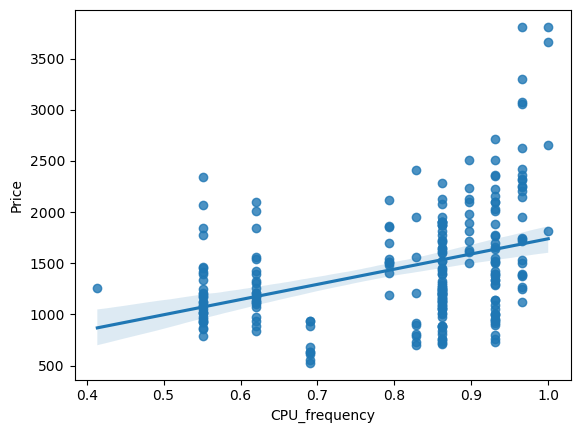

In [5]:
# CPU_frequency plot
sns.regplot(x='CPU_frequency',y='Price',data=df)

<AxesSubplot:xlabel='Screen_Size_inch', ylabel='Price'>

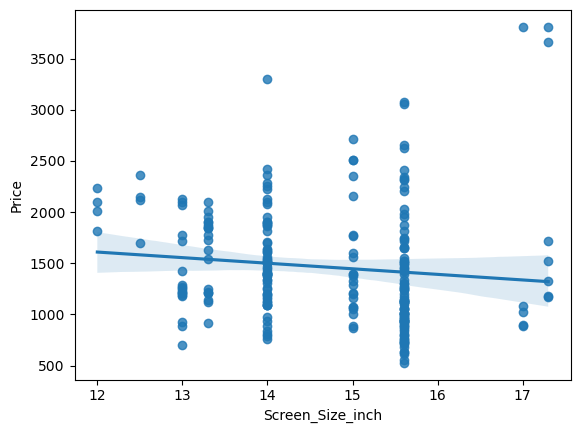

In [6]:
# Screen_Size_inch plot
sns.regplot(x='Screen_Size_inch',y='Price',data=df)

<AxesSubplot:xlabel='Weight_pounds', ylabel='Price'>

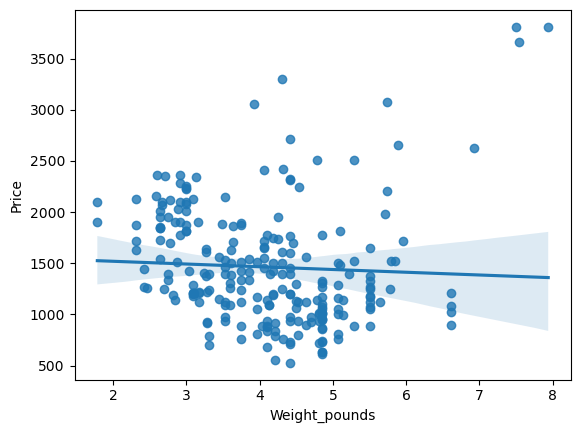

In [7]:
# Weight_pounds plot
sns.regplot(x='Weight_pounds',y='Price',data=df)

In [8]:
# Correlation values of the three attributes with Price
df[['CPU_frequency','Screen_Size_inch','Weight_pounds','Price']].corr()

,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000948,0.066522,0.366666
Screen_Size_inch,-0.000948,1.000000,0.797534,-0.110644
Weight_pounds,0.066522,0.797534,1.000000,-0.050312
Price,0.366666,-0.110644,-0.050312,1.000000


In [9]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<AxesSubplot:xlabel='Category', ylabel='Price'>

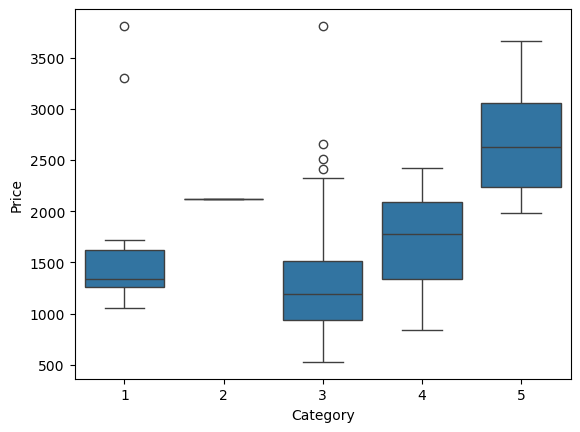

In [10]:
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df)

<AxesSubplot:xlabel='GPU', ylabel='Price'>

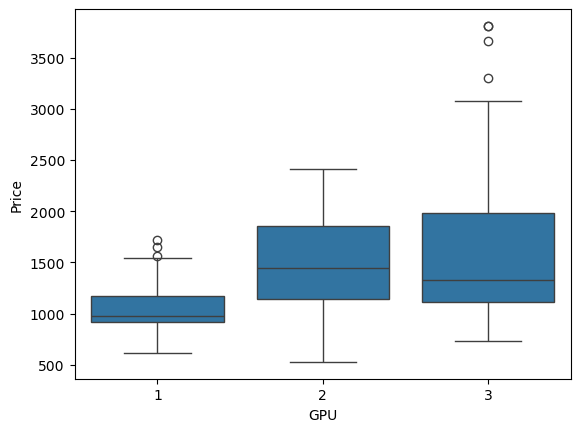

In [11]:
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df)

<AxesSubplot:xlabel='OS', ylabel='Price'>

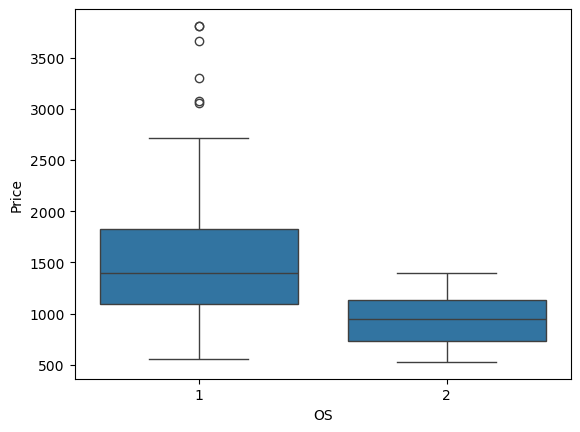

In [12]:
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df)

<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

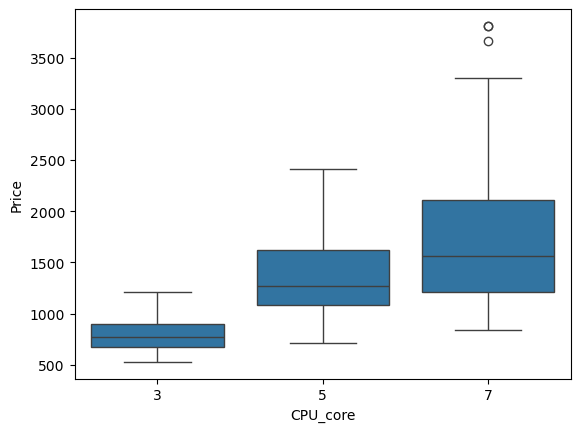

In [13]:
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df)

<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

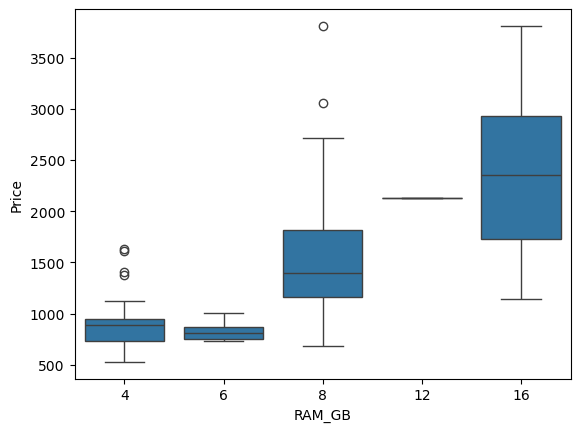

In [14]:
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df)

<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

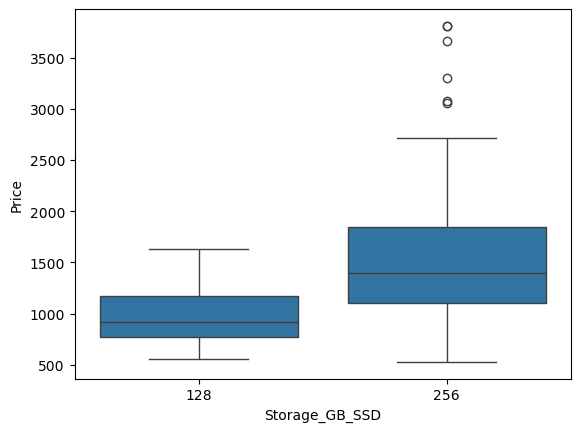

In [15]:
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [17]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [21]:
# Create the group
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
grouped_pivot=df[["GPU", "CPU_core","Price" ]].groupby(["GPU", "CPU_core"],as_index=False).mean().pivot(index='GPU',columns='CPU_core')

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [20]:
# Create the Pivot table
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

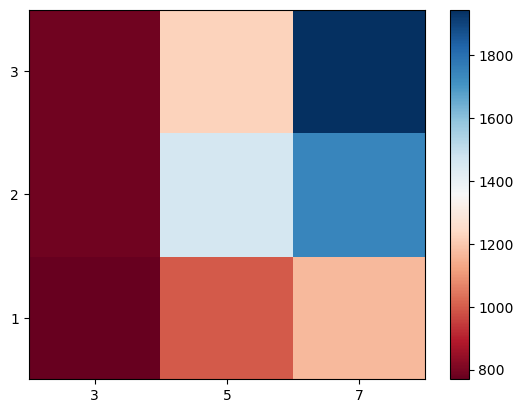

In [23]:
# Create the Plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [24]:
from scipy import stats

for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857849  with a P-value of P = 3.681560628843424e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.3666655589258861  with a P-value of P = 5.5024633507147195e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810297  with a P-value of P = 0.00014898923191727792
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118291  with a P-value of P = 0.0885339784683266
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.050312258377515455  with a P-value of P = 0.4397693853434932
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551174  with a P-value of P = 7.912950127010751e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827356  with a P-value of P = 0.0005696642559248205
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881427  w